In [1]:
import numpy as nump 
import math 
import pandas as pan #reading lines from csv file intp an array later 
import os 
import glob # getting the csv files which are stored in the same folder
import tkinter as tkin
from tkinter import filedialog
import matplotlib.pyplot as plt 

import ruptures as rpt
from scipy.signal import savgol_filter

In [ ]:
root=tkin.Tk()
root.withdraw() 
my_working_path= filedialog.askdirectory(title="Choose folder in which other folders with the csv files from the linescan are found:")# opens a window on your computer to select the folder
os.chdir(my_working_path) 
work=os.getcwd()
my_csv_files = glob.glob(os.path.join(work, "*.csv")) # identifies the csv files in this directory
print(my_csv_files)

In [5]:
#Search for taxol and the minute in the titel of the csv document 
for l in range(len(my_csv_files)):
    if "Kopie" not in my_csv_files[l]:
        titel=my_csv_files[l]
        indice_time=titel.find('Min' or'min')
        start=indice_time-2
        end=indice_time
        time=titel[start:end]
    
        indice_tax=titel.find('tax'or'TAX'or'Tax' and not "wo")
        if (indice_tax <0):#testing for -1
            tax=" "
        else: 
            tax="taxol"    
        print(my_csv_files[l])
        print(time, tax)
        
#indice_time=titel.find('min')
#indice_tax=titel.find('tax') 

D:\2022_06_03_0,20,60_MTcapped_wandwoTAX\60MinTAx\MT1\Values_Plot of Acquired-139_568_alphatub_60Min_tax_corrected_inv_MT1.csv
60 taxol
D:\2022_06_03_0,20,60_MTcapped_wandwoTAX\60MinTAx\MT1\Values_Plot of Acquired-_MT1_140_488_acetyltub_60min_tax_cor_inv.csv
60 taxol


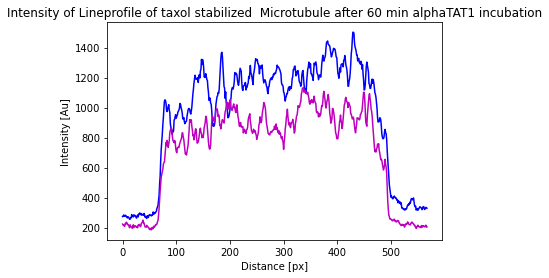

In [6]:
for l in range(len(my_csv_files)):
    if "Kopie" not in my_csv_files[l]:
        #later insert code for title search 
        if "Values_Plot" and "alpha" in my_csv_files[l]:
            Data_568=pan.read_csv(my_csv_files[l],sep=',')# using panda for reading the csv file in Dataframe
            plt.plot(Data_568.iloc[:,0],Data_568.iloc[:,1], c="b")# Data_568.iloc[:,0] is x-Data and Data_568.iloc[:,1] is y-data from panda frame 
            array_568=Data_568.to_numpy() # array_568 contains the alphatubulin Data from the Lineprofile over a single MT 
            #print(Data_568)
            #print(array_568)
            #print(Data_568.iloc[:,1])
        elif "Values_Plot" and"acetyl" in my_csv_files[l]:
            Data_488=pan.read_csv(my_csv_files[l],sep=',')
            plt.plot(Data_488.iloc[:,0],Data_488.iloc[:,1], c="m")  
            plt.xlabel("Distance [px]")
            plt.ylabel("Intensity [Au]")
            plt.title("Intensity of Lineprofile of {} stabilized  Microtubule after {} min alphaTAT1 incubation".format(tax, time))
            array_488=Data_488.to_numpy()# array_488 contains the alphatubulin Data from the Lineprofile over a single MT 
    #print(my_csv_files[l],reading) #all the csv files in the directory with the same indetifier
#print(Data_568)
#print(Data_568.columns)



In [16]:
#converting pixel in µm 0.045400065, 22.0264 pixel/µm
Data_568["Distance_µm"] = Data_568.iloc[:,0].multiply(0.0454)
Data_488["Distance_µm"] = Data_488.iloc[:,0].multiply(0.0454)
position= Data_568.columns.get_loc("Distance_µm")
position_488= Data_488.columns.get_loc("Distance_µm")
print(position)
print(position_488)
#Data_568.iloc[:,3] = Data_568.iloc[:,0].multiply(0.0454)
print(Data_568.iloc[:,position])




2
2
0       0.0000
1       0.0454
2       0.0908
3       0.1362
4       0.1816
        ...   
563    25.5602
564    25.6056
565    25.6510
566    25.6964
567    25.7418
Name: Distance_µm, Length: 568, dtype: float64


Savitzky-Golay filter

https://www.mikulskibartosz.name/smoothing-time-series-in-python-using-savitzky-golay-filter/ 

https://blog.finxter.com/smoothing-your-data-with-the-savitzky-golay-filter-and-python/

window size parameter specifies how many data points will be used to fit a polynomial regression function. The second parameter specifies the degree of the fitted polynomial function (if we choose 1 as the polynomial degree, we end up using a linear regression function).

Text(0.5, 1.0, 'Intensity of Lineprofile of taxol stabilized  Microtubule after 60 min alphaTAT1 incubation')

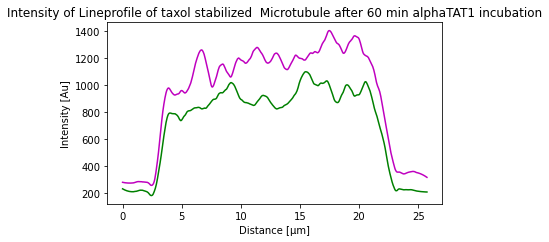

In [22]:
#applying the filter for the acetylated tubulin data 488
smoothed_array_488= savgol_filter(Data_488.iloc[:,1], window_length =41, polyorder = 2)
#plt.plot(Data_488.iloc[:,0],smoothed_array_488, c="m") 
figure = plt.figure()
ax1 = figure.subplots()
# plotting both data sets with the Savitzky-Golay filter
p1 = ax1.plot(Data_568.iloc[:,2], smoothed_array_568, 'm')# plotting the alphatubulin 568 data in magenta 
p1,= ax1.plot(Data_488.iloc[:,2], smoothed_array_488 , 'g')# plotting the acetylatedtubulin 488 data in green 
plt.subplots_adjust(bottom=0.25)
plt.xlabel("Distance [µm]")
plt.ylabel("Intensity [Au]")
plt.title("Intensity of Lineprofile of {} stabilized  Microtubule after {} min alphaTAT1 incubation".format(tax, time))

Text(0.5, 1.0, 'Intensity of Lineprofile of taxol stabilized  Microtubule after 60 min alphaTAT1 incubation')

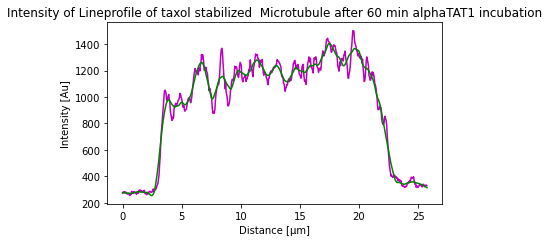

In [20]:
# applying Savitzky–Golay filter to the data 
smoothed_array_568 = savgol_filter(Data_568.iloc[:,1], window_length =41, polyorder = 2)
#applying the filter for the alphatubulin data 568
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(Data_568.iloc[:,2], Data_568.iloc[:,1], 'm')# magenta displays the original data set 
p,= ax.plot(Data_568.iloc[:,2], smoothed_array_568 , 'g')# green displays the same data set but with the Savitzky–Golay filter applied to the data  
plt.subplots_adjust(bottom=0.25)
plt.xlabel("Distance [µm]")
plt.ylabel("Intensity [Au]")
plt.title("Intensity of Lineprofile of {} stabilized  Microtubule after {} min alphaTAT1 incubation".format(tax, time))


Panda Dataframe to array: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html 

Useful Links for the package rupture for change point analysis: 
https://pypi.org/project/ruptures/#files 
https://centre-borelli.github.io/ruptures-docs/code-reference/detection/pelt-reference/
https://centre-borelli.github.io/ruptures-docs/examples/kernel-cpd-performance-comparison/#gaussian-kernel
https://centre-borelli.github.io/ruptures-docs/user-guide/costs/costrbf/ 
https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/


algo_new: [70, 495, 568]
algo3: [70, 490, 568]


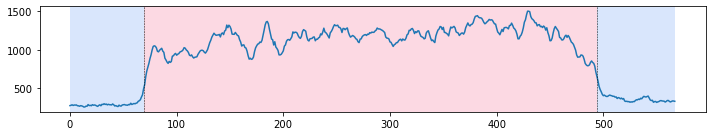

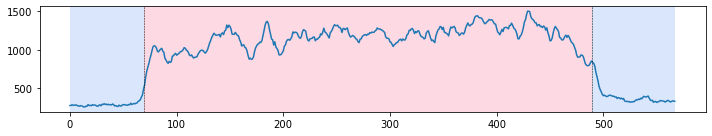

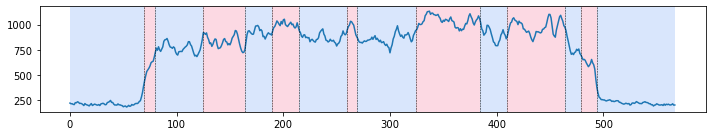

[544.187]


In [10]:
 
# detection
#algo = rpt.Pelt(model="rbf").fit_predict(array_568, 50.0)
#algo=rpt.Dynp(model="rbf").fit_predict(array_568,n_bkps=2)
#algo3=rpt.Dynp(model="rbf").fit_predict(array_568,n_bkps=2)
#algo4=rpt.Dynp(model="l2").fit_predict(smoothed_array_568,n_bkps=2)

algo_new=rpt.Window(width=50, model="rbf").fit_predict(array_568,n_bkps=2)# windowapproach so far the best fit, do not know why though
algo2=rpt.Pelt(model="rbf").fit_predict(array_488,1.1) # Increase penalty from 1.1 to achieve better fit for acetylated Data 
#  fit_predict(self, signal, pen) # Fit to the signal and return the optimal breakpoints. Helper method to call fit and predict once

# display
rpt.display(array_568[:,1],algo_new,algo_new, computed_chg_pts_linewidth=0.5)
rpt.display(array_488[:,1],algo2, algo2,computed_chg_pts_linewidth=0.5)

#rpt.display(smoothed_array_568,algo4,algo4, computed_chg_pts_linewidth=0.5)
#rpt.display(array_568[:,1],algo3,algo3, computed_chg_pts_linewidth=0.5)
#rpt.display(array_568[:,1],algo,algo, computed_chg_pts_linewidth=0.5)#just selects the intensity values for the display function of rupture

plt.show()
print(array_568[70:71,1])
#costfunction with penalty 800 aber ohne determination of number of changepoints for acetylated signal patches 
#minimum distance between changepoints 
# ein parameter ändern und dann vergleichen 

First seper